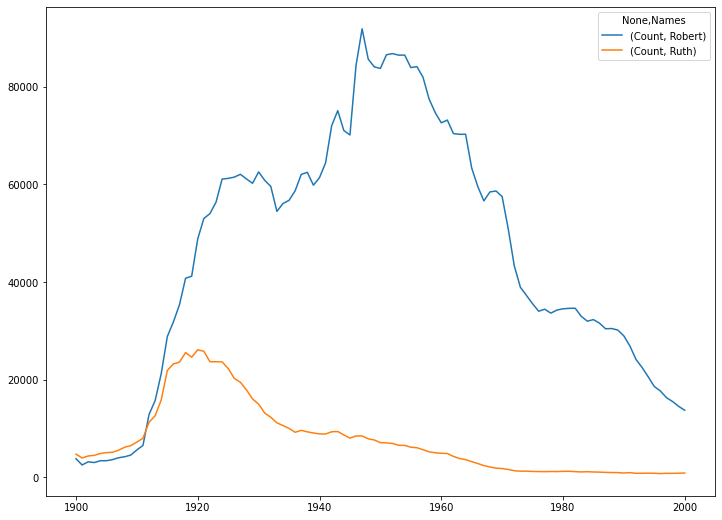

In [1]:
from pylab import rcParams
import pandas


rcParams['figure.figsize'] = 12,9

FILES_PATH = './data_files/names'

dataframe_list = {}
for item in range(1900,2001):
    dataframe_list[item] = pandas.read_csv(f'{FILES_PATH}/yob{item}.txt', names = ['Names', 'Gender', 'Count'])
    
df = pandas.concat(dataframe_list).reset_index(level=1, drop=True).drop(['Gender'], axis = 1)
df = df.loc[df['Names'].isin(['Ruth', 'Robert'])]
df = df.groupby([df.index, 'Names']).sum()
df.unstack('Names').plot()


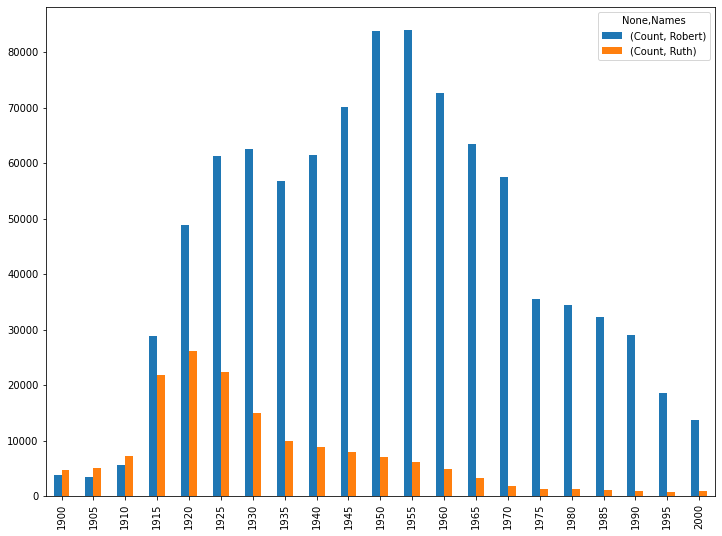

In [2]:
dataframe_list = {}
for item in range(1900,2001,5):
    dataframe_list[item] = pandas.read_csv(f'{FILES_PATH}/yob{item}.txt', names = ['Names', 'Gender', 'Count'])
    
df = pandas.concat(dataframe_list).reset_index(level=1, drop=True).drop(['Gender'], axis = 1)
df = df.loc[df['Names'].isin(['Ruth', 'Robert'])]
df = df.groupby([df.index, 'Names']).sum()
df.unstack('Names').plot(kind='bar')

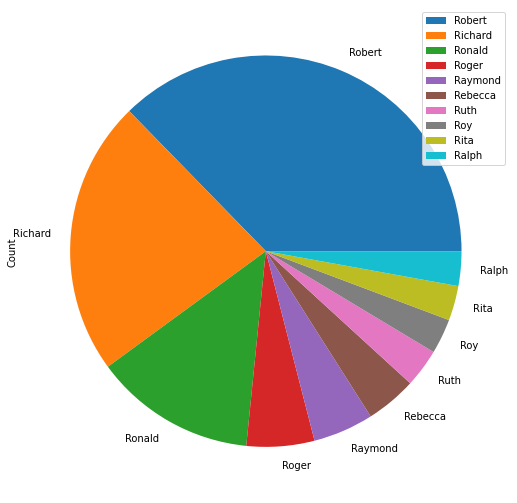

In [3]:
dataframe_list = {}
item = [1950]
for item in item:
    dataframe_list[item] = pandas.read_csv(f'{FILES_PATH}/yob{item}.txt', names = ['Names', 'Gender', 'Count'])
    
df = pandas.concat(dataframe_list).reset_index(level=1, drop=True).drop(['Gender'], axis = 1)
df['Start_R'] = df.apply(lambda x: x['Names'][0] == 'R', axis = 1)
df = df.loc[df['Start_R'].isin([True])]
df = df.groupby([df.index, 'Names']).sum().sort_values(by='Count', ascending=False).reset_index(level=0).head(10)
df.plot(kind='pie', y='Count')

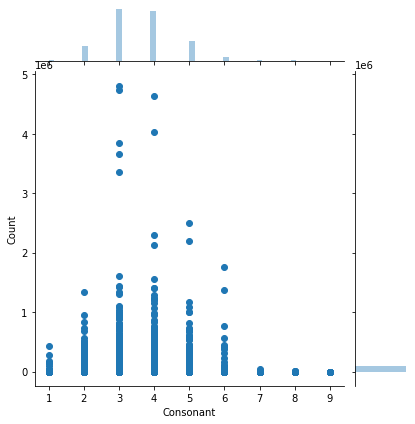

In [4]:
import seaborn
dataframe_list = {}
for item in range(1900,2001):
    dataframe_list[item] = pandas.read_csv(f'{FILES_PATH}/yob{item}.txt', names = ['Names', 'Gender', 'Count'])
    
df = pandas.concat(dataframe_list).reset_index(drop=True).drop(['Gender',], axis = 1)
df = df.groupby(['Names']).sum().reset_index(level=0)
df['Consonant'] = df.apply(lambda x: len(set(x['Names']).difference(set('aeiou'))), axis=1)
seaborn.jointplot(x='Consonant', y='Count', 
              data=df, kind='scatter')